# Skin Cancer Prediction Model

<hr/>

> **Model Prepared By: Mohammad Ali**
IIT Madras

<hr/>

**1.** In this project, I used Tensorflow to implement a Skin Cancer detection model. <br/>
**2.** I used a dataset that contains images for the two categories that are malignant or benign. <br/>
**3.** I implemented transfer learning technique to achieve better results in less amount of training. <br/>
**4.** I also used EfficientNet architecture as the backbone of the model along with the pre-trained weights of the same obtained by training it on the image net dataset.

In [1]:
#importing important libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
 
from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
from functools import partial
 
AUTO = tf.data.experimental.AUTOTUNE
import warnings
warnings.filterwarnings('ignore')

In [10]:
images = glob(r'C:\Users\mohd ali\OneDrive\Desktop\train_cancer/*/*.jpg')
len(images)

270

In [56]:
images[:5]

['C:/Users/mohd ali/OneDrive/Desktop/train_cancer/benign/12.jpg',
 'C:/Users/mohd ali/OneDrive/Desktop/train_cancer/benign/13.jpg',
 'C:/Users/mohd ali/OneDrive/Desktop/train_cancer/benign/14.jpg',
 'C:/Users/mohd ali/OneDrive/Desktop/train_cancer/benign/17.jpg',
 'C:/Users/mohd ali/OneDrive/Desktop/train_cancer/benign/19.jpg']

In [13]:
images = [path.replace('\\', '/') for path in images]
df = pd.DataFrame({'filepath': images})
df['label'] = df['filepath'].str.split('/', expand=True)[6]
df.head()

,filepath,label
0,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,benign
1,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,benign
2,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,benign
3,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,benign
4,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,benign


In [15]:
df['label_bin'] = np.where(df['label'].values == 'malignant', 1, 0)
df.tail()

,filepath,label,label_bin
265,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,malignant,1
266,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,malignant,1
267,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,malignant,1
268,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,malignant,1
269,C:/Users/mohd ali/OneDrive/Desktop/train_cance...,malignant,1


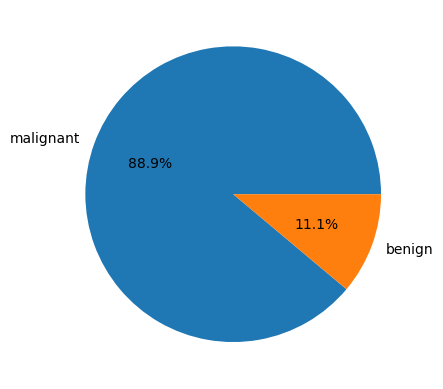

In [16]:
x = df['label'].value_counts()
plt.pie(x.values,
        labels=x.index,
        autopct='%1.1f%%')
plt.show()

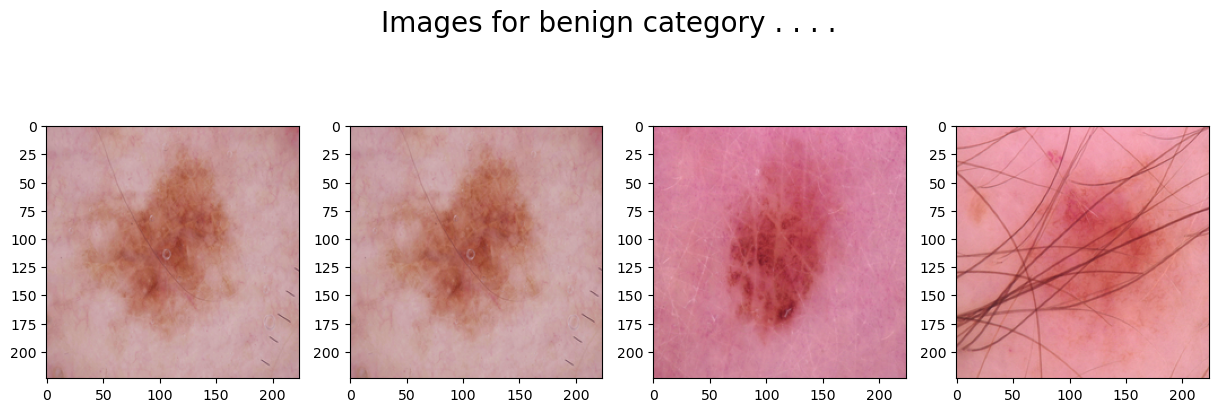

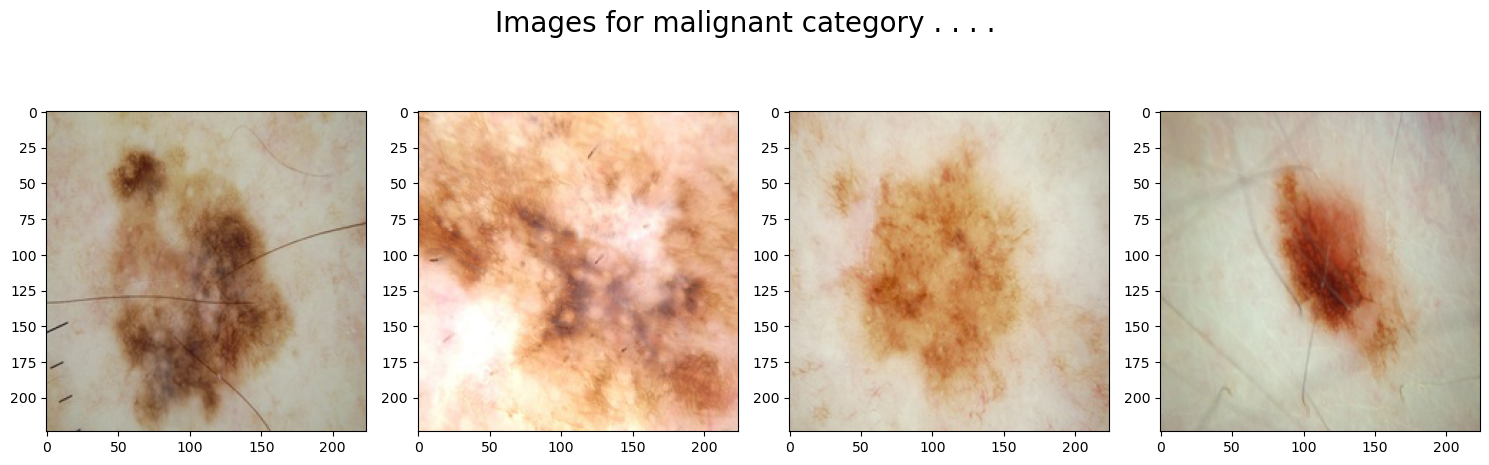

In [17]:
for cat in df['label'].unique():
    temp = df[df['label'] == cat]
 
    index_list = temp.index
    fig, ax = plt.subplots(1, 4, figsize=(15, 5))
    fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)
    for i in range(4):
        index = np.random.randint(0, len(index_list))
        index = index_list[index]
        data = df.iloc[index]
 
        image_path = data[0]
 
        img = np.array(Image.open(image_path))
        ax[i].imshow(img)
plt.tight_layout()
plt.show()

In [21]:
features = df['filepath']
target = df['label_bin']
 
X_train, X_val, Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.15,
                                      random_state=10)
 
X_train.shape, X_val.shape

((229,), (41,))

In [32]:
label_mapping = {'benign': 0, 'malignant': 1}

In [43]:
Y_val.dtype

dtype('int32')

In [47]:
# checking the decode function
decode_image(r"C:\Users\mohd ali\OneDrive\Desktop\train_cancer\benign\24.jpg")

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.9098039 , 0.6901961 , 0.7411765 ],
         [0.9019608 , 0.68235296, 0.7254902 ],
         [0.9098039 , 0.68235296, 0.7372549 ],
         ...,
         [0.8039216 , 0.5529412 , 0.5568628 ],
         [0.79607844, 0.5411765 , 0.5568628 ],
         [0.80784315, 0.5686275 , 0.5568628 ]],
 
        [[0.9019608 , 0.67058825, 0.6784314 ],
         [0.9137255 , 0.67058825, 0.72156864],
         [0.8980392 , 0.67058825, 0.7254902 ],
         ...,
         [0.79607844, 0.54901963, 0.5803922 ],
         [0.8       , 0.5568628 , 0.5764706 ],
         [0.79607844, 0.5568628 , 0.5764706 ]],
 
        [[0.8862745 , 0.65882355, 0.7176471 ],
         [0.8980392 , 0.6784314 , 0.7137255 ],
         [0.91764706, 0.7058824 , 0.76862746],
         ...,
         [0.8235294 , 0.5882353 , 0.5882353 ],
         [0.8117647 , 0.5764706 , 0.60784316],
         [0.7921569 , 0.5686275 , 0.5921569 ]],
 
        ...,
 
        [[0.8039216 , 0.60784316

In [49]:
def decode_image(filepath, label=None):
    
 
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0
 
    if label == 0:
        Label = 0
    else:
        Label = 1
 
    return img, Label

In [39]:
def decode_image(image_path, label):
    label_str = tf.constant('benign', dtype=tf.string)  # String tensor
    label_int = tf.constant(0, dtype=tf.int32)  # Integer tensor

    condition = tf.equal(label, label_str)
    label_int = tf.cond(condition, lambda: label_int, lambda: label_mapping[label.numpy().decode('utf-8')])
    img = tf.io.read_file(filepath)
    img = tf.image.decode_jpeg(img)
    img = tf.image.resize(img, [224, 224])
    img = tf.cast(img, tf.float32) / 255.0
    return img, Label


In [50]:
train_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_train, Y_train))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)
 
val_ds = (
    tf.data.Dataset
    .from_tensor_slices((X_val, Y_val))
    .map(decode_image, num_parallel_calls=AUTO)
    .batch(32)
    .prefetch(AUTO)
)

## Building the Model

**1.** The base model is the EfficientNet model in this case. <br>
**2.** The Flatten layer flattens the output of the base model’s output. <br>
**3.** Then we will have two fully connected layers followed by the output of the flattened layer.<br>
**4.** We have included some BatchNormalization layers to enable stable and fast training and a Dropout layer before the final layer to avoid any possibility of overfitting.<br>
**5.** The final layer is the output layer which outputs soft probabilities for the three classes. 

In [24]:
from tensorflow.keras.applications.efficientnet import EfficientNetB7
 
pre_trained_model = EfficientNetB7(
    input_shape=(224, 224, 3),
    weights='imagenet',
    include_top=False
)
 
for layer in pre_trained_model.layers:
    layer.trainable = False

258076736/258076736 [==============================] - 112s 0us/step


In [25]:
from tensorflow.keras import Model
 
inputs = layers.Input(shape=(224, 224, 3))
x = layers.Flatten()(inputs)
 
x = layers.Dense(256, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.BatchNormalization()(x)
outputs = layers.Dense(1, activation='sigmoid')(x)
 
model = Model(inputs, outputs)

In [27]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=['AUC'])

In [51]:
history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=5,
                    verbose=1)

Epoch 1/5
8/8 [==============================] - 5s 442ms/step - loss: 0.7688 - auc: 0.7225 - val_loss: 0.7666 - val_auc: 0.5000
Epoch 2/5
8/8 [==============================] - 3s 395ms/step - loss: 0.5656 - auc: 0.9035 - val_loss: 0.1264 - val_auc: 0.9797
Epoch 3/5
8/8 [==============================] - 3s 382ms/step - loss: 0.4895 - auc: 0.9237 - val_loss: 0.2920 - val_auc: 0.9561
Epoch 4/5
8/8 [==============================] - 3s 375ms/step - loss: 0.4155 - auc: 0.9613 - val_loss: 0.3847 - val_auc: 0.9932
Epoch 5/5
8/8 [==============================] - 3s 383ms/step - loss: 0.3433 - auc: 0.9780 - val_loss: 0.0804 - val_auc: 1.0000


In [52]:
hist_df = pd.DataFrame(history.history)
hist_df.head()

,loss,auc,val_loss,val_auc
0,0.768799,0.722527,0.766553,0.500000
1,0.565636,0.903467,0.126413,0.979730
2,0.489495,0.923740,0.292000,0.956081
3,0.415490,0.961254,0.384715,0.993243
4,0.343271,0.978022,0.080358,1.000000


#### Visualizing the training and validation losses

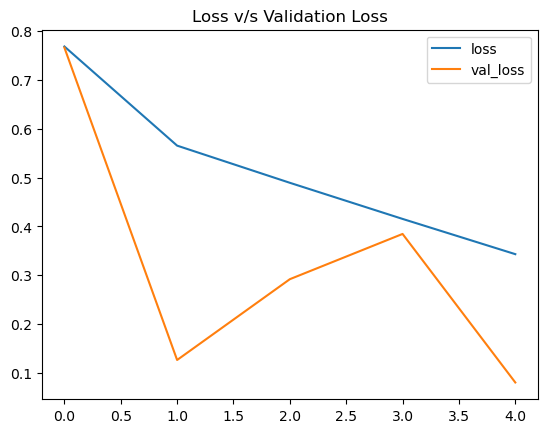

In [53]:
hist_df['loss'].plot()
hist_df['val_loss'].plot()
plt.title('Loss v/s Validation Loss')
plt.legend()
plt.show()

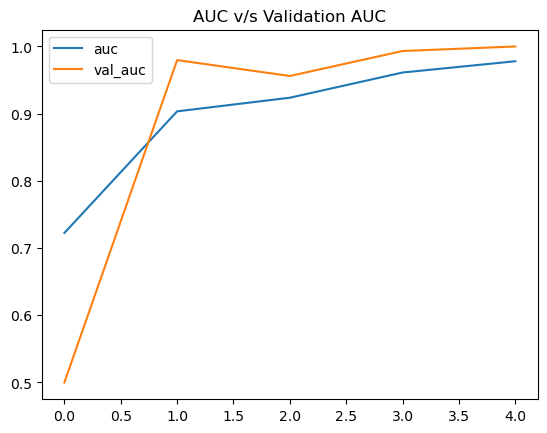

In [54]:
hist_df['auc'].plot()
hist_df['val_auc'].plot()
plt.title('AUC v/s Validation AUC')
plt.legend()
plt.show()